In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data=pd.read_csv("50_Startups.csv")

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [4]:
data['State'].value_counts()

New York      17
California    17
Florida       16
Name: State, dtype: int64

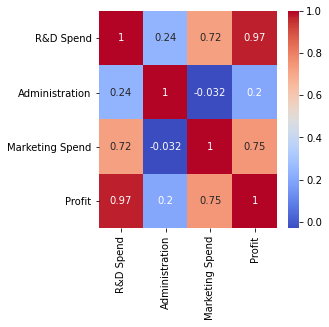

In [5]:
plt.figure(figsize=(4,4))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm')


In [6]:
data.groupby(data['State'])['Profit'].sum()

State
California    1766387.98
Florida       1900384.39
New York      1933859.59
Name: Profit, dtype: float64

# ANOVA TEST FOR STATE_PROFIT RELATION

In [7]:
state_list=data['State'].unique()
profit_state={}

In [8]:
for s in state_list:
    profit_state[s]=data['Profit'][data.State==s]

In [9]:
profit_state

{'New York': 0     192261.83
 3     182901.99
 5     156991.12
 8     152211.77
 15    129917.04
 17    125370.37
 19    122776.86
 21    111313.02
 24    108552.04
 27    105008.31
 29    101004.64
 31     97483.56
 35     96479.51
 38     81229.06
 43     69758.98
 45     64926.08
 48     35673.41
 Name: Profit, dtype: float64,
 'California': 1     191792.06
 6     156122.51
 9     149759.96
 11    144259.40
 13    134307.35
 16    126992.93
 20    118474.03
 25    107404.34
 32     97427.84
 34     96712.80
 37     89949.14
 39     81005.76
 40     78239.91
 42     71498.49
 44     65200.33
 47     42559.73
 49     14681.40
 Name: Profit, dtype: float64,
 'Florida': 2     191050.39
 4     166187.94
 7     155752.60
 10    146121.95
 12    141585.52
 14    132602.65
 18    124266.90
 22    110352.25
 23    108733.99
 26    105733.54
 28    103282.38
 30     99937.59
 33     96778.92
 36     90708.19
 41     77798.83
 46     49490.75
 Name: Profit, dtype: float64}

In [10]:
import scipy.stats as sc

In [11]:
sc.f_oneway(profit_state["New York"],profit_state["California"],profit_state["Florida"])

F_onewayResult(statistic=0.5747908867225173, pvalue=0.5667290310967406)

# Check Outliers

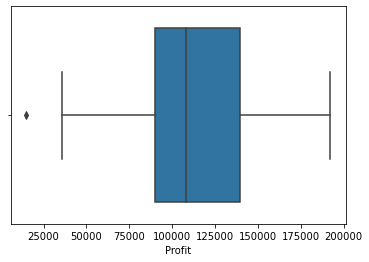

In [12]:
sns.boxplot(data.Profit)

In [13]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
R&D Spend,50.0,73721.6156,45902.256482,0.00,39936.3700,73051.080,101602.8000,165349.20
Administration,50.0,121344.6396,28017.802755,51283.14,103730.8750,122699.795,144842.1800,182645.56
Marketing Spend,50.0,211025.0978,122290.310726,0.00,129300.1325,212716.240,299469.0850,471784.10
Profit,50.0,112012.6392,40306.180338,14681.40,90138.9025,107978.190,139765.9775,192261.83


In [14]:
iqr_profit=139765.9775-90138.9025

In [15]:
lb=90138.9025-1.5*iqr_profit
lb

15698.289999999979

In [16]:
data.replace(14681.4,lb,inplace=True)#No outliers now

# Encoding

In [17]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(),[3])],remainder='passthrough')
data=np.array(ct.fit_transform(data))

In [18]:
data

array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
        1.3689780e+05, 4.7178410e+05, 1.9226183e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
        1.5137759e+05, 4.4389853e+05, 1.9179206e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
        1.0114555e+05, 4.0793454e+05, 1.9105039e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
        1.1867185e+05, 3.8319962e+05, 1.8290199e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
        9.1391770e+04, 3.6616842e+05, 1.6618794e+05],
       [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
        9.9814710e+04, 3.6286136e+05, 1.5699112e+05],
       [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
        1.4719887e+05, 1.2771682e+05, 1.5612251e+05],
       [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
        1.4553006e+05, 3.2387668e+05, 1.5575260e+05],
       [0.0000000e+00, 0

In [19]:
x=data[:,:-1]
y=data[:,-1]
x,y

(array([[0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.6534920e+05,
         1.3689780e+05, 4.7178410e+05],
        [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.6259770e+05,
         1.5137759e+05, 4.4389853e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.5344151e+05,
         1.0114555e+05, 4.0793454e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.4437241e+05,
         1.1867185e+05, 3.8319962e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.4210734e+05,
         9.1391770e+04, 3.6616842e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.3187690e+05,
         9.9814710e+04, 3.6286136e+05],
        [1.0000000e+00, 0.0000000e+00, 0.0000000e+00, 1.3461546e+05,
         1.4719887e+05, 1.2771682e+05],
        [0.0000000e+00, 1.0000000e+00, 0.0000000e+00, 1.3029813e+05,
         1.4553006e+05, 3.2387668e+05],
        [0.0000000e+00, 0.0000000e+00, 1.0000000e+00, 1.2054252e+05,
         1.4871895e+05, 3.1161329e+05],
        [1.0000000e

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

# Linear Regression

In [21]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()

In [22]:
lr.fit(x_train,y_train)

LinearRegression()

In [23]:
y_pred=lr.predict(x_test)
y_pred_train=lr.predict(x_train)

In [24]:
y_pred

array([103038.42705943, 132606.01998601, 132420.92130847,  72001.42798463,
       178464.06606903, 116166.90370307,  67884.49823949,  98818.29111318,
       113966.22723718, 167854.71727175])

In [25]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred),r2_score(y_train,y_pred_train)

(0.9346452492229155, 0.9510637653744862)

# Svm

In [27]:
from sklearn.svm import SVR
svr_model=SVR(kernel="linear")

In [28]:
svr_model.fit(x_train,y_train)

SVR(kernel='linear')

In [29]:
y_pred_train_sv=svr_model.predict(x_train)
y_pred_sv=svr_model.predict(x_test)

In [30]:
y_pred_sv

array([107111.89015727, 135519.84131198, 136572.99136691,  73484.33418898,
       186156.61915736, 121372.66467624,  67437.32806449,  99643.49580531,
       119722.20416217, 174337.04366259])

In [31]:
y_test

array([103282.38, 144259.4 , 146121.95,  77798.83, 191050.39, 105008.31,
        81229.06,  97483.56, 110352.25, 166187.94])

In [32]:
r2_score(y_test,y_pred_sv),r2_score(y_train,y_pred_train_sv)

(0.9341879526936157, 0.9406623958211902)

# Decision Tree

In [33]:
from sklearn.tree import DecisionTreeRegressor

In [34]:
dtr=DecisionTreeRegressor(criterion='mse')

In [35]:
dtr.fit(x_train,y_train)

DecisionTreeRegressor()

In [36]:
y_pred_train_dt=dtr.predict(x_train)
y_pred_dt=dtr.predict(x_test)

In [37]:
r2_score(y_test,y_pred_dt),r2_score(y_train,y_pred_train_dt)

(0.9589635197429642, 1.0)

In [38]:
np.set_printoptions(precision=2,suppress=True)
dtr.feature_importances_

array([0.  , 0.  , 0.  , 0.98, 0.  , 0.01])

In [39]:
from sklearn.tree import plot_tree

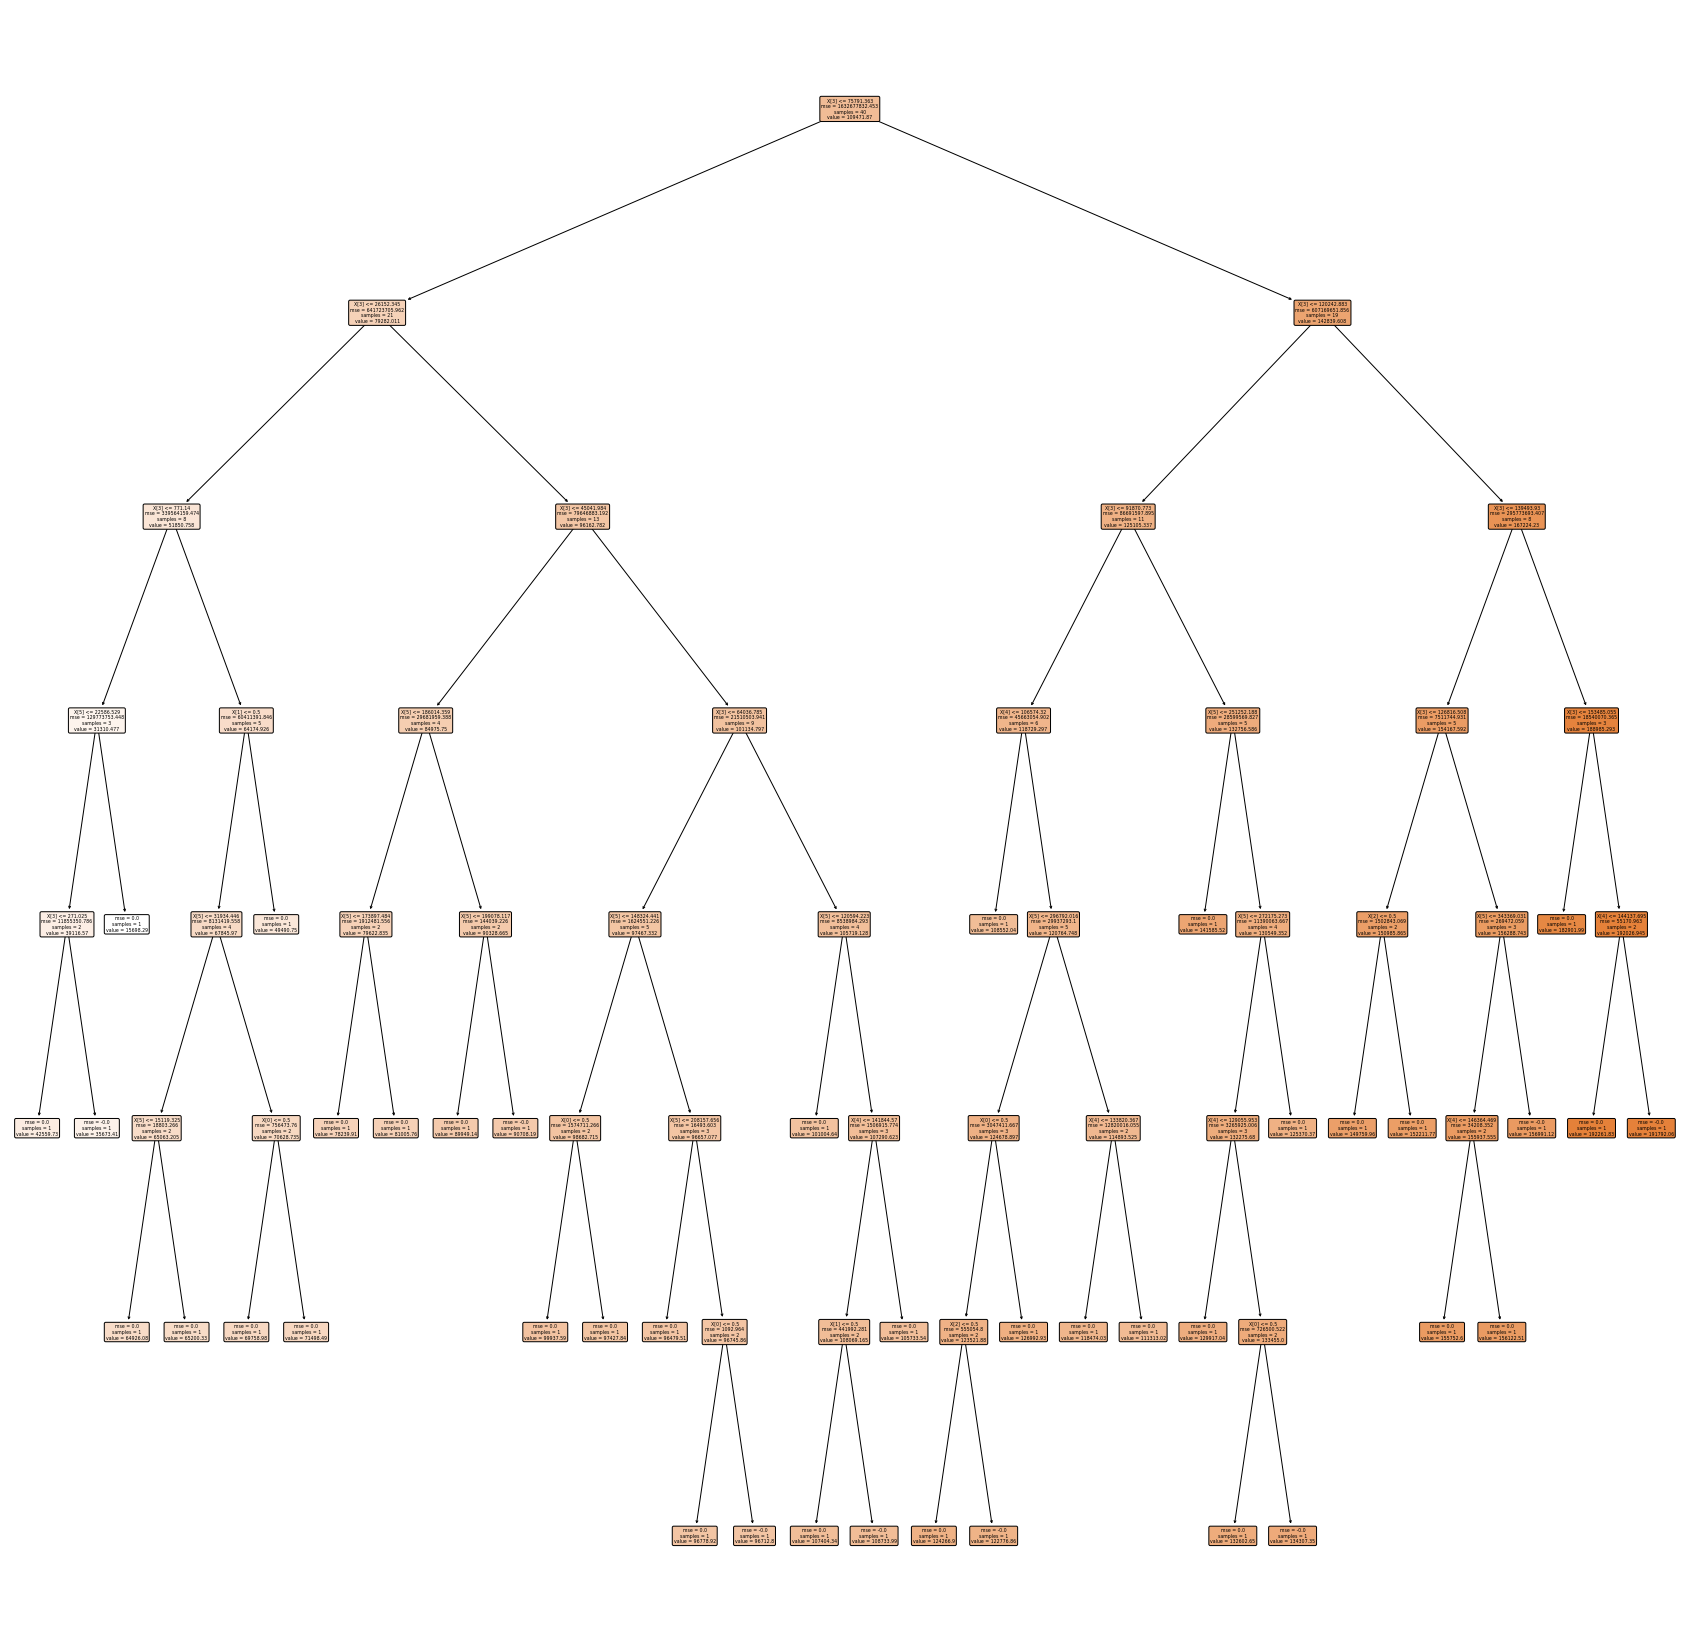

In [40]:
plt.figure(figsize=(30,30))
plot_tree(dtr,filled=True,rounded=True)
plt.show()

# Random Forest

In [45]:
from sklearn.ensemble import RandomForestRegressor

In [52]:
rf=RandomForestRegressor(n_estimators=100,criterion='mse',bootstrap=True,random_state=10)
rf.fit(x_train,y_train)

RandomForestRegressor(random_state=10)

In [53]:
y_pred_rf=rf.predict(x_test)
y_pred_train_rf=rf.predict(x_train)

In [54]:
r2_score(y_test,y_pred),r2_score(y_train,y_pred_train_rf)

(0.9346452492229155, 0.988934887964112)